# Visualizing Word Vectors with t-SNE

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words. 

### Steps

1. Clean the data
2. Build a corpus
3. Train a Word2Vec Model
4. Visualize t-SNE representations of the most common words 

Credit: Some of the code was inspired by this awesome [NLP repo][1]. 




  [1]: https://github.com/rouseguy/DeepLearningNLP_Py

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline



C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = pd.read_csv('data/train.csv').sample(50000, random_state=23)

In [3]:
%%time
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

Wall time: 52.9 s


In [4]:
%%time
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

Wall time: 312 ms


In [5]:
len(corpus)

99998

In [6]:
for sentence in data['question1'][1:10].iteritems():
    print(sentence)

(181001, 'inspiring start stories')
(294691, 'best way digital marketing')
(104145, 'best way grow facebook fan page')
(357893, 'suppose host sends two tcp segments back back host b tcp connection first segment sequence number 140 second sequence number 170')
(105590, 'sahara average temperatures compare ones dashte loot')
(7908, 'possible disable facetimes call button')
(31614, 'agencies fulfil sex fantasies usa')
(153346, 'signs mentally weak')
(179559, 'different quora')


# Word 2 Vec

The Word to Vec model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

In [7]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['trump']

array([ 0.23917276, -1.04546237, -0.85689855, -0.60778391, -0.90594095,
       -0.53869778, -0.11922305, -0.53713542,  0.243222  , -0.28214774,
        0.1062211 , -0.58161777,  0.26620227, -0.3933062 , -0.41919994,
        0.30857214, -1.01047134, -1.16173255, -0.38250691, -0.37101728,
        0.70403701, -0.48470163, -0.3024888 ,  0.53610694,  1.40335274,
        0.95616406,  0.0413908 ,  0.70525628,  0.71226448, -0.45859259,
       -1.17255676,  0.22468106,  0.0607027 ,  0.07352885,  0.07442194,
       -0.61998546,  0.86903912, -0.07554229,  0.25091776,  0.03076726,
       -0.19918814,  0.3764039 ,  0.73222345,  0.17747836, -0.2236084 ,
        0.53430682, -0.14649494,  0.31358215, -0.4719637 , -0.30830368,
        0.45050308,  0.39025122,  0.56011665,  0.96269578, -0.41480765,
        0.3285169 , -0.41666788, -0.33412695,  1.30933082, -0.4963145 ,
       -0.47054562, -0.01529832,  0.7035839 ,  1.10301471, -0.44522113,
        0.01376037, -1.10593128, -0.87155998,  0.49274233, -0.12

In [1]:
%%time
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], color = label)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

Wall time: 0 ns


In [ ]:
labels = []
tokens = []
for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

In [ ]:
tsne_plot(model)

In [ ]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

In [ ]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
#tsne_plot(model)

# It's Becoming Hard to Read

With a dataset this large, its difficult to make an easy-to-read TSNE visualization. What you can do is use the model to look up the most similar words from any given point. 

In [ ]:
model.most_similar('trump')

In [ ]:
model.most_similar('universe')

In [ ]:
data[['question1', 'question2']].head()
#corpus[294691]

In [ ]:
corpus[0:10]

In [8]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=10, workers=4)

In [11]:
import csv
with open('eggs.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])

In [12]:
with open('eggs.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter='\t',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for ind, row in data[['question1', 'question2']][0:1].iterrows():
        q1 = row['question1'].split() 
        q2 = row['question2'].split()
        print('q1 {}; q2 {}'.format(q1,q2) )
    #best business opportunities india 	top business opportunities available india
        print('\t', q2)
        for w1 in q1:
            res = ''        
            for w2 in q2:
                try:
                    #print('{} {} similaraty {:.2f}'.format(w1, 
                    #                  w2, model.similarity(w1, w2)))
                    #res = res + '\t' + str(round(model.similarity(w1, w2), 3))
                    spamwriter.writerow([w1, w2, str(round(model.similarity(w1, w2), 3))])
                except KeyError:
                    print('\nError in {} and {}'.format(w1,w2))
                    raise
            print(w1 + res)


q1 ['sex', 'necessary', 'relationship']; q2 ['sex', 'important', 'good', 'relationship']
	 ['sex', 'important', 'good', 'relationship']
sex
necessary
relationship


In [13]:
'\t'.join(q2)

'sex\timportant\tgood\trelationship'

In [14]:
data.loc[237921, ['question1', 'question2']]

question1         sex necessary relationship
question2    sex important good relationship
Name: 237921, dtype: object

In [15]:
q1, q2

(['sex', 'necessary', 'relationship'],
 ['sex', 'important', 'good', 'relationship'])

In [16]:
from igraph import *
g = Graph.Full_Bipartite(len(q1), len(q2))
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["label"] = g.vs["name"]
print(list(g.vs))

[igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 0, {'label': 'Alice', 'name': 'Alice', 'type': False}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 1, {'label': 'Bob', 'name': 'Bob', 'type': False}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 2, {'label': 'Claire', 'name': 'Claire', 'type': False}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 3, {'label': 'Dennis', 'name': 'Dennis', 'type': True}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 4, {'label': 'Esther', 'name': 'Esther', 'type': True}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 5, {'label': 'Frank', 'name': 'Frank', 'type': True}), igraph.Vertex(<igraph.Graph object at 0x000000000E7EE4F8>, 6, {'label': 'George', 'name': 'George', 'type': True})]


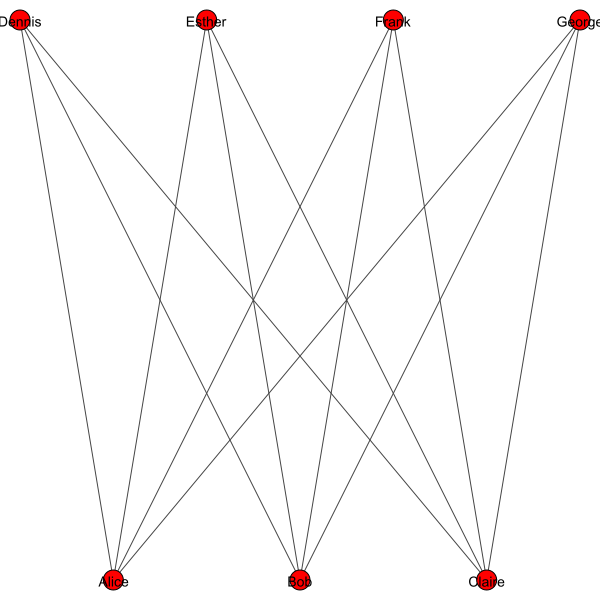

In [17]:
layout = g.layout("bipartite")
plot(g, layout = layout, vertex_label = g.vs["name"])

# The End

Good luck!

In [18]:
options(jupyter.plot_mimetypes = c('text/plain', 'image/png'))

SyntaxError: keyword can't be an expression (<ipython-input-18-e53b99e6917f>, line 1)